A jumble of cells. basically a cheatsheet to understand what I've done in certain parts of my internship

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
import matplotlib as mp
import gaia_tools as gt
import scipy
from scipy.ndimage import gaussian_filter

In [3]:
df=pd.read_csv(r'C:/Users/dnurm/Desktop/Uni_files/Thesis/.venv/Data/Poder_vc_DR3_input.csv')

In [4]:
df

,source_id,ra,dec,rgeo,b_rgeo,B_rgeo,r_est,b_rpgeo,B_rpgeo,ra_error,...,ra_parallax_corr,ra_pmra_corr,dec_pmra_corr,dec_pmdec_corr,dec_parallax_corr,parallax_pmdec_corr,parallax_pmra_corr,pmra_pmdec_corr,r_est_error,parallax_over_error
0,132667245587072,45.072796,0.969971,173.284653,172.683990,173.952347,173.385056,172.806274,173.960129,0.0168,...,0.1361,0.0128,-0.0533,0.0522,-0.1712,0.1028,-0.0006,0.1848,0.576927,289.787879
1,250246270117248,45.794345,1.368092,206.803787,205.693710,207.794327,207.000183,206.021637,208.067200,0.0202,...,0.1100,0.0946,-0.0635,0.0410,-0.3350,0.0984,0.1537,0.1370,1.022782,195.918367
2,454514914751488,44.857643,1.651125,152.416534,148.039703,155.904755,150.776596,146.656723,155.209595,0.1433,...,0.0774,-0.0203,0.1817,0.1477,-0.4934,-0.1776,-0.0241,0.2648,4.276436,34.183003
3,1301929142132608,44.655749,2.120449,230.318222,228.889191,231.673080,230.253586,228.467499,231.467667,0.0186,...,-0.0380,-0.0843,-0.0699,-0.0684,-0.4842,-0.0085,0.1650,0.2447,1.500084,179.616667
4,3188656735589888,47.893246,4.723239,242.655655,241.226486,244.326447,242.797134,241.199051,244.316528,0.0222,...,0.0766,-0.1699,0.0800,-0.0462,-0.0802,0.0244,0.3105,0.2920,1.558739,160.388235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1614914,6916181546077871744,315.872807,-2.322352,233.021011,231.881866,234.283997,233.611649,232.425919,234.584106,0.0180,...,-0.0262,0.0080,-0.1839,-0.4424,0.0793,-0.0968,-0.3903,0.2341,1.079093,186.434211
1614915,6916198691587462272,315.343402,-2.514042,298.006836,295.137634,301.049957,297.672485,294.729370,300.152802,0.0239,...,0.0808,-0.1846,-0.2118,-0.4891,0.0611,-0.1110,-0.3640,0.2334,2.711716,109.292763
1614916,6917092972496901504,314.881246,-1.468134,314.780396,311.565857,317.600281,315.386871,312.678436,317.728973,0.0203,...,0.0122,-0.1339,-0.0050,-0.1493,0.1010,-0.2812,-0.3928,0.1782,2.525269,113.721014
1614917,6917335410515389696,314.141917,-1.063458,301.018311,298.321289,304.043884,300.404175,297.447876,303.533417,0.0248,...,-0.1221,-0.1562,-0.0494,-0.2955,0.1938,-0.2080,-0.3908,0.1325,3.042771,97.411243


In [5]:
df.columns

Index(['source_id', 'ra', 'dec', 'rgeo', 'b_rgeo', 'B_rgeo', 'r_est',
       'b_rpgeo', 'B_rpgeo', 'ra_error', 'dec_error', 'parallax',
       'parallax_error', 'PM', 'pmra', 'pmra_error', 'pmdec', 'pmdec_error',
       'radial_velocity', 'radial_velocity_error', 'ra_dec_corr',
       'ra_pmdec_corr', 'ra_parallax_corr', 'ra_pmra_corr', 'dec_pmra_corr',
       'dec_pmdec_corr', 'dec_parallax_corr', 'parallax_pmdec_corr',
       'parallax_pmra_corr', 'pmra_pmdec_corr', 'r_est_error',
       'parallax_over_error'],
      dtype='object')

np.float64(2.910030449001224)

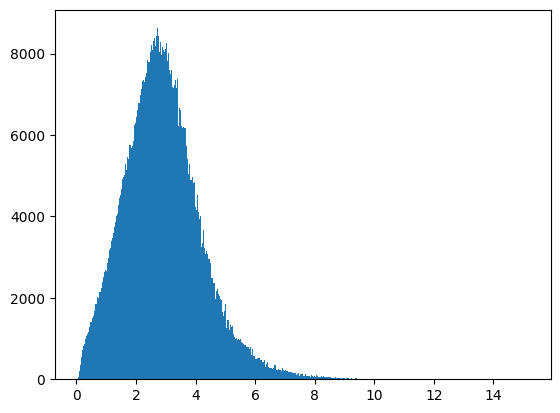

In [6]:
df['distance']=1 / df['parallax'] # df - DataFrame : Pandas librarys oluline. Sellega saad sisse lugeda CSV faile. 
plt.hist(df['distance'], bins=1000) # MatPlotLib library osa. plt-hist teeb lihtsalt histogrammi. Wish ma oleks selliseid shortcute varem teadnud lmao. Histogramm tähtede kaugustest Kiloparsecides
np.mean(df.distance) # numpy library. Also neat shortcut.

np.float64(-5.257641243926164)

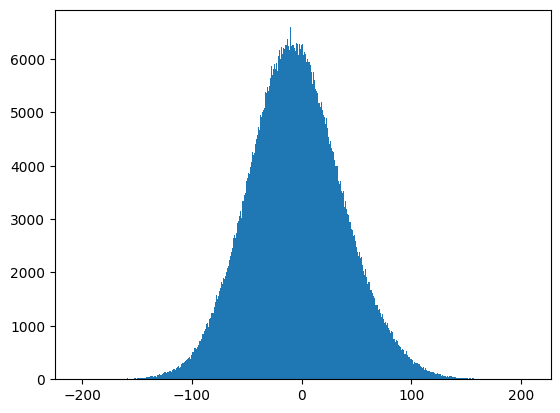

In [7]:
plt.hist(df['radial_velocity'], bins=1000)
np.mean(df['radial_velocity'])

-5.257641243926164


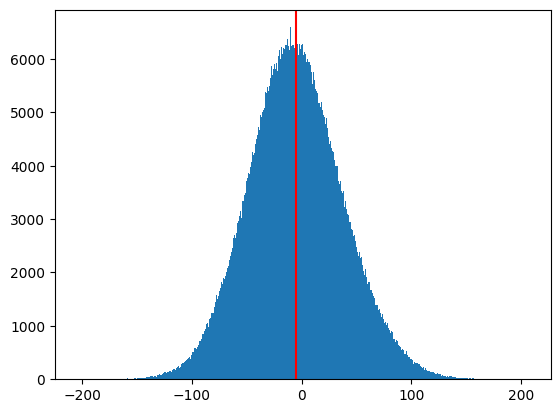

In [8]:
df['radial_velocity']
plt.hist(df['radial_velocity'], bins=1000)
plt.axvline(x=np.nanmean(df['radial_velocity']), color='r')
print(np.nanmean(df['radial_velocity']))

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([1.27826146e-03, 3.61275860e-01, 7.21273458e-01, ...,
        3.59278881e+02, 3.59638879e+02, 3.59998877e+02]),
 array([-89.83121065, -89.65193511, -89.47265957, ...,  89.08577807,
         89.26505361,  89.44432915]),
 <matplotlib.collections.QuadMesh at 0x1df6253a120>)

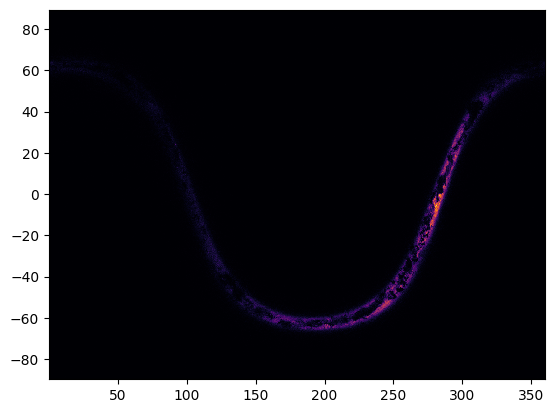

In [9]:
x = df['ra']
y = df['dec']

plt.hist2d(x,y,bins=(1000,1000), cmap = 'inferno')

<Axes: ylabel='ra_error'>

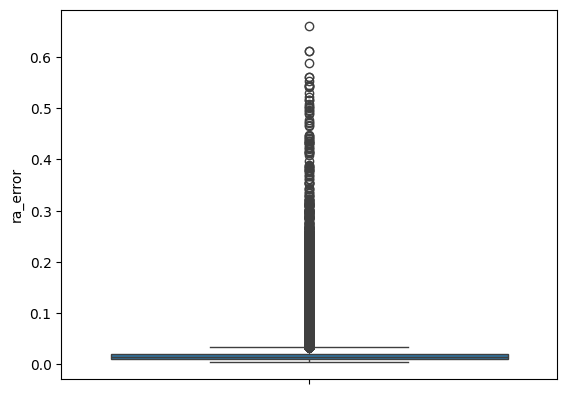

In [10]:
import seaborn as sns
import statistics
#plt.hist2d(df['distance'], df['ra_error'],bins=(100,100))
sns.boxplot(data=df['ra_error'])

Text(0, 0.5, 'Counts')

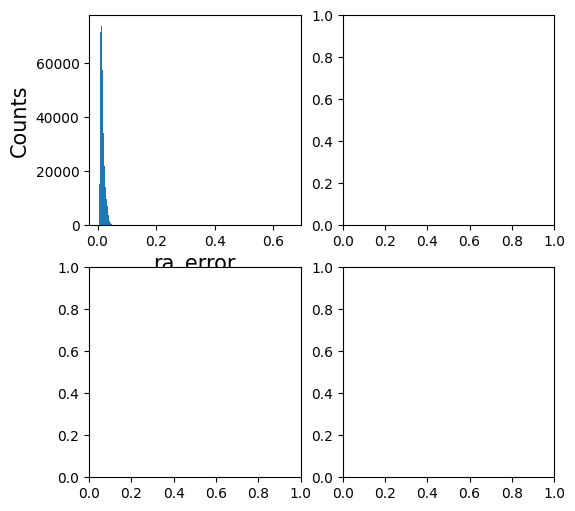

In [11]:
fig, axs = plt.subplots(2,2,figsize=(6,6))

axs[0,0].hist(df['ra_error'], bins=1000)

axs[0,0].set_xlabel('ra_error', fontsize=15)
axs[0,0].set_ylabel('Counts', fontsize=15)

# plt.hist(df['ra_error'], bins=1000)
# print(np.nanmean(df['ra_error']))
# stand_dev = statistics.stdev(df['ra_error'])
# ra_mean = np.nanmean(df['ra_error'])

# plt.xlabel('ra_error', fontsize=15)
# plt.ylabel('Counts', fontsize=15)

# plt.title('Mingi graafik')

# #plt.grid()
# print( ra_mean + 3*stand_dev)

0.017193052097349774
0.04557734538076919


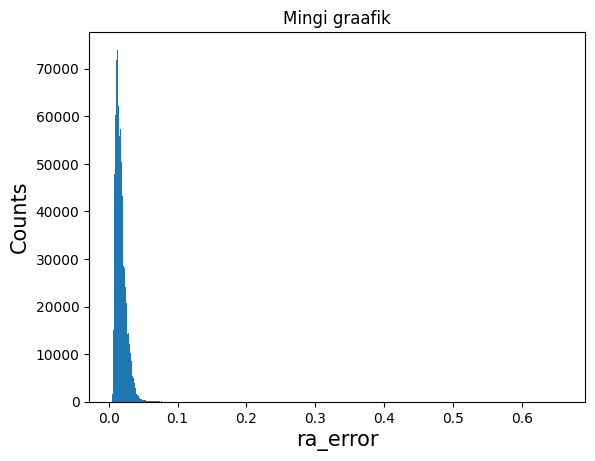

In [12]:
plt.hist(df['ra_error'], bins=1000)
print(np.nanmean(df['ra_error']))
stand_dev = statistics.stdev(df['ra_error'])
ra_mean = np.nanmean(df['ra_error'])

plt.xlabel('ra_error', fontsize=15)
plt.ylabel('Counts', fontsize=15)

plt.title('Mingi graafik')

#plt.grid()
print( ra_mean + 3*stand_dev)

(array([[ 0.,  0.,  0., ...,  3.,  8.,  3.],
        [ 0.,  0.,  3., ...,  5.,  6.,  5.],
        [ 1.,  1., 14., ..., 11.,  4.,  6.],
        ...,
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]]),
 array([ 0.02999103,  0.18143619,  0.33288135,  0.48432651,  0.63577166,
         0.78721682,  0.93866198,  1.09010714,  1.2415523 ,  1.39299745,
         1.54444261,  1.69588777,  1.84733293,  1.99877809,  2.15022324,
         2.3016684 ,  2.45311356,  2.60455872,  2.75600388,  2.90744903,
         3.05889419,  3.21033935,  3.36178451,  3.51322967,  3.66467482,
         3.81611998,  3.96756514,  4.1190103 ,  4.27045546,  4.42190061,
         4.57334577,  4.72479093,  4.87623609,  5.02768125,  5.1791264 ,
         5.33057156,  5.48201672,  5.63346188,  5.78490704,  5.93635219,
         6.08779735,  6.23924251,  6.39068767,  6.54213282,  6.69357798,
         6.84502314,  6.9964683 ,  7.14791346,  7.29935861

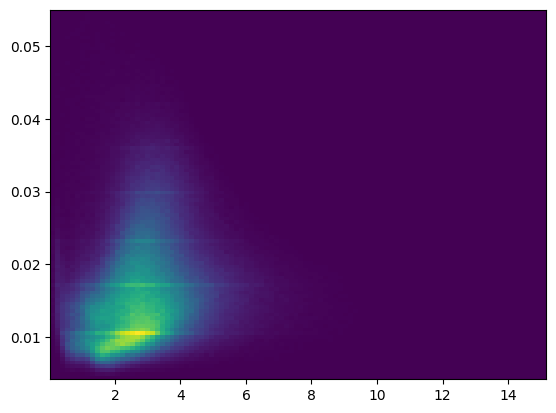

In [13]:
#df_copy = df.copy(deep=True)
df_copy = df.copy()
threshold = ra_mean + 4 * stand_dev
df_ra_copy = df_copy[df_copy['ra_error'] <= threshold]
#plt.hist(df_ra_copy['ra_error'], bins=1000)
#df_ra_copy

plt.hist2d(df_ra_copy['distance'], df_ra_copy['ra_error'],bins=(100,100))


(array([[ 0.,  0.,  0., ..., 12., 12.,  5.],
        [ 0.,  1.,  2., ...,  3.,  7.,  8.],
        [ 1.,  4., 15., ...,  6.,  8.,  7.],
        ...,
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]]),
 array([ 0.05182717,  0.20305396,  0.35428076,  0.50550756,  0.65673435,
         0.80796115,  0.95918795,  1.11041474,  1.26164154,  1.41286834,
         1.56409513,  1.71532193,  1.86654873,  2.01777552,  2.16900232,
         2.32022912,  2.47145591,  2.62268271,  2.77390951,  2.9251363 ,
         3.0763631 ,  3.2275899 ,  3.37881669,  3.53004349,  3.68127029,
         3.83249708,  3.98372388,  4.13495068,  4.28617747,  4.43740427,
         4.58863107,  4.73985786,  4.89108466,  5.04231146,  5.19353825,
         5.34476505,  5.49599184,  5.64721864,  5.79844544,  5.94967223,
         6.10089903,  6.25212583,  6.40335262,  6.55457942,  6.70580622,
         6.85703301,  7.00825981,  7.15948661,  7.3107134 

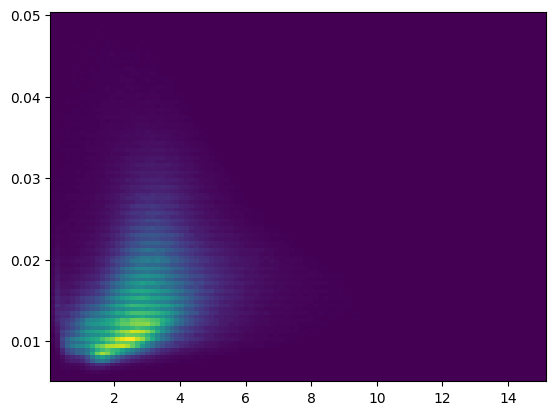

In [14]:
df_copy = df.copy()
dec_mean = np.nanmean(df['dec_error'])
dec_stand_dev = statistics.stdev(df['dec_error'])
threshold = dec_mean + 4 * dec_stand_dev

df_dec_copy = df_copy[df_copy['dec_error'] <= threshold]
#plt.hist(df_dec_copy['dec_error'], bins=1000)
#df_dec_copy

plt.hist2d(df_dec_copy['distance'], df_dec_copy['dec_error'],bins=(100,100))


(array([6.1000e+01, 6.1400e+02, 2.6460e+03, 1.2672e+04, 2.8558e+04,
        5.7490e+04, 6.6728e+04, 8.9861e+04, 9.3995e+04, 7.9735e+04,
        9.1339e+04, 7.6097e+04, 8.4589e+04, 6.9699e+04, 7.7632e+04,
        7.2703e+04, 5.8695e+04, 6.4379e+04, 5.0378e+04, 5.4816e+04,
        4.3454e+04, 4.6688e+04, 4.2668e+04, 3.3121e+04, 3.5618e+04,
        2.7028e+04, 2.8233e+04, 2.1516e+04, 2.2388e+04, 1.9849e+04,
        1.5165e+04, 1.5787e+04, 1.2377e+04, 1.2915e+04, 1.0119e+04,
        1.0625e+04, 9.6150e+03, 7.3950e+03, 7.8230e+03, 6.2110e+03,
        6.2820e+03, 4.7500e+03, 4.8380e+03, 3.6790e+03, 3.6680e+03,
        3.2890e+03, 2.4010e+03, 2.3780e+03, 1.7860e+03, 1.8670e+03,
        1.3900e+03, 1.4740e+03, 1.2210e+03, 9.3400e+02, 9.5700e+02,
        7.6800e+02, 8.0200e+02, 6.3900e+02, 6.4500e+02, 5.4500e+02,
        4.8000e+02, 4.7400e+02, 3.7300e+02, 4.1000e+02, 2.8300e+02,
        3.7200e+02, 2.9800e+02, 2.5300e+02, 2.7300e+02, 1.9600e+02,
        2.0700e+02, 1.9700e+02, 2.0300e+02, 1.94

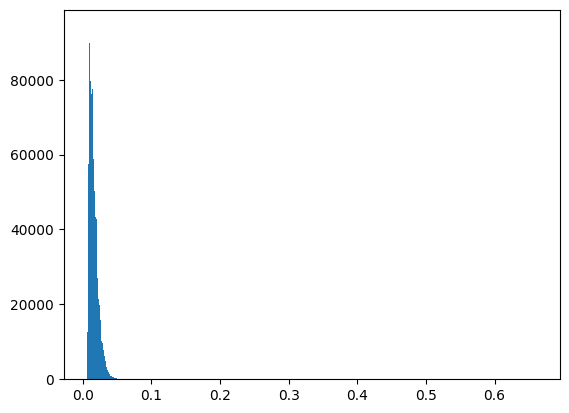

In [15]:
np.nanmean(df['dec_error'])
plt.hist(df['dec_error'], bins=1000)

(array([2.8000e+01, 1.6400e+02, 4.8300e+02, 1.9020e+03, 4.1790e+03,
        1.2736e+04, 1.8949e+04, 3.5924e+04, 3.7800e+04, 5.6604e+04,
        5.0710e+04, 6.6082e+04, 5.3631e+04, 6.6733e+04, 5.2589e+04,
        6.5185e+04, 6.3432e+04, 4.9360e+04, 5.9818e+04, 4.6373e+04,
        5.6657e+04, 4.3096e+04, 5.1891e+04, 3.9700e+04, 4.8010e+04,
        3.6611e+04, 4.2701e+04, 3.2566e+04, 3.8773e+04, 2.9377e+04,
        3.4626e+04, 2.6139e+04, 3.0958e+04, 2.8552e+04, 2.1658e+04,
        2.5487e+04, 1.8742e+04, 2.1464e+04, 1.6047e+04, 1.8424e+04,
        1.3512e+04, 1.5728e+04, 1.1634e+04, 1.3539e+04, 9.8410e+03,
        1.1509e+04, 8.4800e+03, 1.0083e+04, 7.4340e+03, 8.7840e+03,
        8.0220e+03, 6.0690e+03, 7.1530e+03, 5.1780e+03, 6.1210e+03,
        4.5090e+03, 5.4800e+03, 4.0450e+03, 4.5300e+03, 3.4270e+03,
        3.8550e+03, 2.7100e+03, 3.1750e+03, 2.4340e+03, 2.6380e+03,
        1.9700e+03, 2.2090e+03, 1.9590e+03, 1.4310e+03, 1.5500e+03,
        1.1830e+03, 1.3500e+03, 9.8800e+02, 1.13

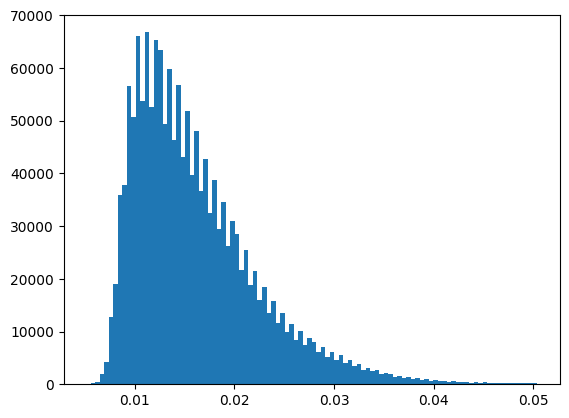

In [16]:
plt.hist(df_dec_copy['dec_error'], bins=100)

np.float64(2.261187787127404)

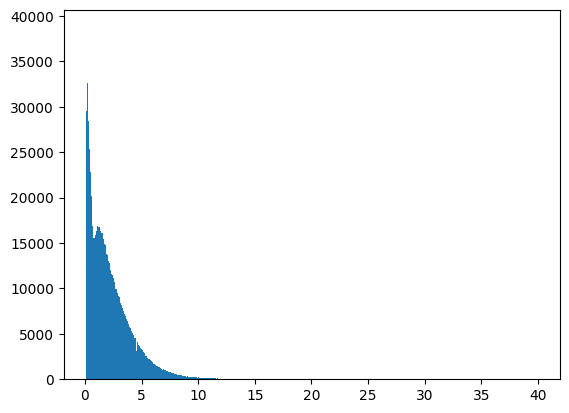

In [17]:
ra_vel_err_mean = np.nanmean(df['radial_velocity_error'])
plt.hist(df['radial_velocity_error'], bins=1000)
ra_vel_err_mean

(array([[1.938e+03, 2.220e+02, 4.400e+01, ..., 0.000e+00, 0.000e+00,
         1.000e+00],
        [5.816e+03, 1.295e+03, 2.500e+02, ..., 4.000e+00, 2.000e+00,
         1.000e+00],
        [4.439e+03, 4.025e+03, 1.157e+03, ..., 2.000e+00, 3.000e+00,
         9.000e+00],
        ...,
        [0.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00,
         0.000e+00],
        [0.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00,
         0.000e+00],
        [0.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00,
         0.000e+00]]),
 array([ 0.02999103,  0.18143619,  0.33288135,  0.48432651,  0.63577166,
         0.78721682,  0.93866198,  1.09010714,  1.2415523 ,  1.39299745,
         1.54444261,  1.69588777,  1.84733293,  1.99877809,  2.15022324,
         2.3016684 ,  2.45311356,  2.60455872,  2.75600388,  2.90744903,
         3.05889419,  3.21033935,  3.36178451,  3.51322967,  3.66467482,
         3.81611998,  3.96756514,  4.1190103 ,  4.27045546,  4.42190061,
       

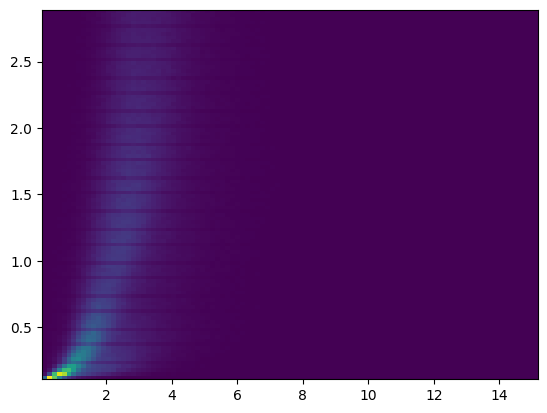

In [18]:
df_copy = df.copy()
ra_err_mean = np.nanmean(df['radial_velocity_error'])
ra_err_stand_dev = statistics.stdev(df['radial_velocity_error'])
threshold = ra_err_mean + 0.3 * ra_err_stand_dev

df_rad_err_copy = df_copy[df_copy['radial_velocity_error'] <= threshold]
#plt.hist(df_dec_copy['dec_error'], bins=1000)
#df_dec_copy

plt.hist2d(df_rad_err_copy['distance'], df_rad_err_copy['radial_velocity_error'],bins=(100,100))

In [19]:
from astropy import units as u
from astropy.coordinates import SkyCoord

#df_copy1 = df.copy()

#c = SkyCoord(ra = df['ra'], dec = df['dec'])

#c = SkyCoord(ra=df['ra'], dec=df['dec'], frame='icrs', unit='deg')
#c.galactic 

In [20]:
#c = SkyCoord(ra=df['ra'], dec=df['dec'], frame='icrs', unit='deg')
#c

In [21]:
#c.galactic.__dir__()

In [22]:
#plt.hist2d(c.galactic.l.ddeg, c.galactic.b.ddeg, bins=(1000, 1000))

#fig, axs = plt.subplots(1,2,figsize=(25,10))

#lat_shift = (c.galactic.l.ddeg + 1800) % 3600

#axs[0].hist2d(c.ra.ddeg/10, c.dec.ddeg/10, bins=(1000,1000))
#axs[1].hist2d(lat_shift/10, c.galactic.b.ddeg/10, bins=(1000, 1000))

# axs[0].set_xlabel('latitude (degrees)', fontsize=15)
# axs[0].set_ylabel('longitude (degrees)', fontsize=15)
# axs[1].set_xlabel('Right Ascension (degrees)', fontsize=15)
# axs[1].set_ylabel('Declination (degrees)', fontsize=15)


In [23]:
# from gaia_tools import data_analysis as gt_da
# from gaia_tools import transformation_constants
# galactic_coord = gt_da.get_transformed_data(df, z_0 = transformation_constants.Z_0, r_0 = transformation_constants.R_0, v_sun = transformation_constants.V_SUN)

In [24]:
# plt.hist2d(galactic_coord['x'], galactic_coord['y'],bins=(1000,1000))

In [25]:
from astropy.table import Table
from scipy import stats


In [26]:
dat = Table.read(r'C:/Users/dnurm/Desktop/Uni_files/Thesis/.venv/Data/KGiants_Conroy_etal_2021_v1(1).fits', format='fits')
df_15 = dat.to_pandas()

In [27]:
df_15

,UNWISE_ID,GAIAEDR3_ID,EBV,GAIAEDR3_RA,GAIAEDR3_DEC,GAIAEDR3_G,GAIAEDR3_G_ERR,GAIAEDR3_BP,GAIAEDR3_BP_ERR,GAIAEDR3_RP,GAIAEDR3_RP_ERR,UNWISE_W1,UNWISE_W1_ERR,GAIAEDR3_PARALLAX_CORRECTED,GAIAEDR3_PMRA,GAIAEDR3_PMDEC,DIST_PHOT,GAIAEDR3_PMRA_REFLEXCORR,GAIAEDR3_PMDEC_REFLEXCORR,R_GAL
0,b'1063p045o0040893',3152546784573374080,0.248648,106.910374,5.144382,15.790149,0.000842,16.636093,0.010388,15.056962,0.002623,13.013145,0.002880,0.058996,0.643325,-0.696128,54.667904,0.359925,0.050545,61.790474
1,b'1133m091o0002179',3041189891883389184,0.277816,113.997963,-9.795792,17.146376,0.002006,17.910135,0.017919,16.504566,0.007817,14.671235,0.008059,0.120115,0.321907,-0.594906,76.323288,0.171585,-0.176716,82.077667
2,b'1268m288o0030584',5645037184007974784,0.270146,126.087631,-28.602309,16.300873,0.000584,17.100908,0.007355,15.596975,0.002598,13.628637,0.003803,0.019637,0.411021,-0.542073,61.060642,0.341477,-0.267759,64.429367
3,b'2973p151o0096598',4317750521295201664,0.274603,297.135263,15.258268,17.385571,0.001059,18.106146,0.012897,16.732576,0.007020,14.912774,0.010377,0.167488,-0.216620,-0.623563,77.869934,-0.092901,-0.265528,73.298950
4,b'0880p166o0008181',3349625993217985024,0.298539,88.287894,16.163517,16.293289,0.000939,17.087559,0.010789,15.614635,0.003166,13.693978,0.004372,0.172801,0.648666,-1.137348,58.248215,0.223265,-0.388929,66.190353
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296,b'3397m425o0011150',6544916189235036672,0.015371,339.468721,-42.522774,16.533480,0.000775,17.333403,0.008540,15.673275,0.002693,13.498853,0.003422,0.017715,0.336006,-0.643029,80.497200,0.141141,-0.029165,76.632050
1297,b'3355m076o0013186',2622351759280470528,0.055346,335.893366,-7.425422,17.269846,0.001092,17.964598,0.019535,16.474756,0.010232,14.508584,0.007347,-0.089100,0.172096,-0.640929,88.449097,0.017322,-0.165964,85.804855
1298,b'3387m061o0005497',2622836197232267648,0.058702,338.052510,-6.478163,17.038054,0.001228,17.786222,0.018634,16.247536,0.006629,14.209988,0.005879,0.087871,0.055373,-0.943211,86.662537,-0.116584,-0.464419,84.345001
1299,b'0138m107o0020639',2473018293314760576,0.039701,14.125710,-9.914587,17.442162,0.000874,18.108023,0.011163,16.709568,0.007977,14.898009,0.009196,0.020319,0.527249,-0.808266,83.051643,0.156040,-0.320656,84.883179


In [28]:
df_15.columns

Index(['UNWISE_ID', 'GAIAEDR3_ID', 'EBV', 'GAIAEDR3_RA', 'GAIAEDR3_DEC',
       'GAIAEDR3_G', 'GAIAEDR3_G_ERR', 'GAIAEDR3_BP', 'GAIAEDR3_BP_ERR',
       'GAIAEDR3_RP', 'GAIAEDR3_RP_ERR', 'UNWISE_W1', 'UNWISE_W1_ERR',
       'GAIAEDR3_PARALLAX_CORRECTED', 'GAIAEDR3_PMRA', 'GAIAEDR3_PMDEC',
       'DIST_PHOT', 'GAIAEDR3_PMRA_REFLEXCORR', 'GAIAEDR3_PMDEC_REFLEXCORR',
       'R_GAL'],
      dtype='object')

In [29]:
ra = df_15['GAIAEDR3_RA'].values
dec = df_15['GAIAEDR3_DEC'].values

#ra = np.radians(ra)
#ra = ((ra + np.pi) % (2 * np.pi)) -np.pi
#dec = np.radians(dec)

#n_bins = 25
#ra_bins = np.linspace(-np.pi, np.pi, n_bins)
#dec_bins = np.linspace(-np.pi/2, np.pi/2, n_bins)


#density, ra_edges, dec_edges = np.histogram2d(ra, dec, bins = [ra_bins, dec_bins])





In [30]:
#mean_density = np.mean(density)

#over_density = (density - mean_density)-mean_density

#RA_grid, DEC_grid = np.meshgrid(ra_edges[:-1], dec_edges[:-1])

#fig = plt.figure(figsize=(10,5))
#ax = fig.add_subplot (111, projection = "mollweide")

#im = ax.pcolormesh(RA_grid, DEC_grid, over_density.T, cmap='coolwarm', shading = 'auto', vmin = -1, vmax = 1)

#plt.colorbar(im, label = 'Overdensity(δ)')

#plt.title("Mollweide projection of overdensity")
#plt.grid(True)

#plt.show()

<SkyCoord (Galactic): (l, b) in deg
    (280.45825787, -32.89037687)>


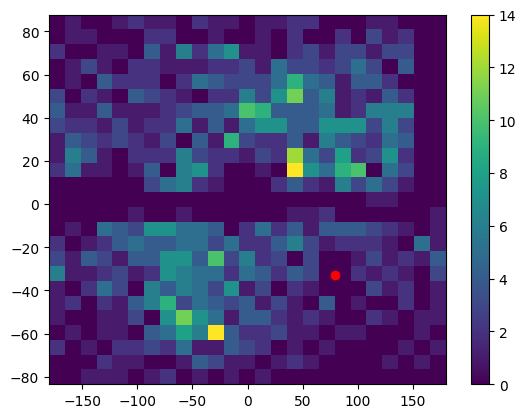

In [31]:
import astropy.units as u
from astropy.coordinates import SkyCoord

gc = SkyCoord(ra*u.degree, dec*u.degree, frame = 'icrs')

c_LMC = SkyCoord('05h23m34s', '-69d45m00s', frame = 'icrs')
print(c_LMC.galactic)
c_LMC.galactic.l.wrap_at(180*u.deg).value

gal_l = -gc.galactic.l.wrap_at(180*u.deg).value
gal_b = gc.galactic.b.value
gal_coords_hist = plt.hist2d(gal_l, gal_b, (25, 25))
plt.colorbar()
plt.scatter(-c_LMC.galactic.l.wrap_at(180*u.deg).value, c_LMC.galactic.b.value, color = 'r')

mean_l = np.arctan2(np.mean(np.sin(np.radians(gal_l))), np.mean(np.cos(np.radians(gal_l))))
mean_l = np.degrees(mean_l)
mean_b = np.mean(gal_b)

od_l = (gal_l - mean_l)/mean_l
od_b = (gal_b - mean_b)/mean_b



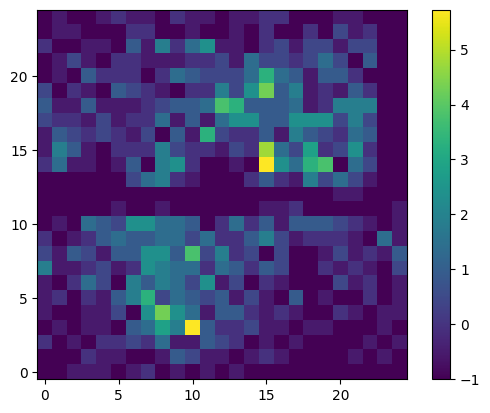

In [ ]:
fig,ax = plt.subplots()
gal_coords_hist = np.histogram2d(gal_l, gal_b, (25, 25))[0]
overdensity = gal_coords_hist/np.mean(gal_coords_hist)-1
im = ax.imshow(overdensity.T, origin='lower')
fig.colorbar(im, ax=ax)

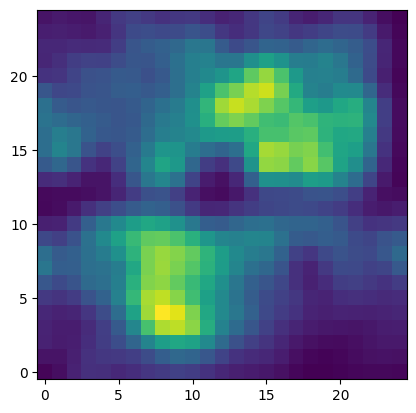

In [40]:
##smoothing the histogram with gauss filter
hist_smoothed = gaussian_filter(overdensity, sigma=1)

##plotting the smoothed histogram
plt.imshow(hist_smoothed.T, origin='lower')

In [ ]:
pm_ra = df_15['GAIAEDR3_PMRA']
pm_dec = df_15['GAIAEDR3_PMDEC']


In [ ]:
pm_ra_mean = scipy.stats.binned_statistic_2d(gal_l, gal_b, pm_ra, bins=(25,25))
pm_dec_mean = scipy.stats.binned_statistic_2d(gal_l, gal_b, pm_dec, bins=(25,25))
#pm_mean = plt.hist2d(pm_ra_mean, pm_dec_mean, (25, 25))



In [ ]:
#fig,ax = plt.subplots()
#pm_mean = np.stack((pm_ra_mean, pm_dec_mean), axis=0)
#im = ax.imshow(pm_mean, origin='lower')
#fig.colorbar(im, ax=ax)


In [ ]:
pm_ra_mean

BinnedStatistic2dResult(statistic=array([[        nan,         nan,  0.89045691,         nan,  0.64384896,
         0.7402755 ,  0.7337926 ,  0.60425885,  0.33918045,  0.21155062,
                nan,         nan,         nan,         nan,  0.27622093,
         0.61770087,  0.18703763,  0.1362066 ,  0.04067837,  0.01775997,
                nan,         nan, -0.29949304,         nan,         nan],
       [        nan,         nan,         nan,  0.72201985,         nan,
         0.80209294,         nan,  0.66011465,  0.44615537,         nan,
         0.83141178,         nan,         nan,         nan,  0.4972352 ,
         0.47731023,  0.38182029, -0.05179077,  0.10455965,         nan,
        -0.27776495, -0.15778503,         nan, -0.38688049, -0.25658044],
       [ 0.75765735,         nan,  0.55747098,         nan,         nan,
                nan,  0.64810869,  0.27226254,  0.73096056,  0.34246153,
                nan,         nan,         nan,         nan,  0.46882385,
         0.5087

In [ ]:
stars = np.load('C:/Users/dnurm/Desktop/Uni_files/Thesis/.venv/Data/star_particles_pos_5e8.npy')
starsdf = pd.DataFrame(stars)

In [ ]:
starsdf = starsdf.rename(columns={0:"x", 1:"y", 2:"z"})
starsdf

,x,y,z
0,-59.901396,-59.786540,-59.904186
1,-59.728709,-59.933465,-59.782787
2,-59.742581,-59.898744,-59.763000
3,-59.553781,-59.825328,-59.602922
4,-59.633807,-59.674192,-59.613868
...,...,...,...
134217723,59.858566,59.565775,59.496852
134217724,59.918089,59.959316,59.256551
134217725,59.886980,59.991138,59.760848
134217726,59.830758,59.755509,59.988484


In [ ]:
starsdf["z"] = pd.to_numeric(starsdf["z"], errors="coerce")
starsdf['z'] = np.where((starsdf['z'] > 20) | (starsdf['z'] < -20), np.nan, starsdf['z'])
starsdf = starsdf.dropna(subset=["z"])

In [ ]:
x_s = starsdf['x']
y_s = starsdf['y']
z_s = starsdf['z']


bins = (35, 35)

#plt.hist2d(x_s,y_s, bins=bins, cmap = "inferno")
#plt.title("Star simulation x, y; bins = (35,35)")
#plt.xlabel("x (kpc)")
#plt.ylabel("y (kpc)")
#cmap = plt.colorbar()
#cmap.set_label('number of stars per bin', rotation=270, labelpad=20)

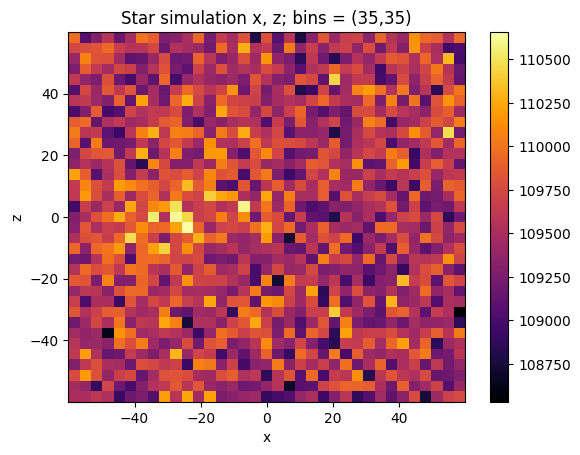

In [ ]:
plt.hist2d(x_s, z_s, bins=bins, cmap = "inferno")
plt.title("Star simulation x, z; bins = (35,35)")
plt.xlabel("x")
plt.ylabel("z")
plt.colorbar()

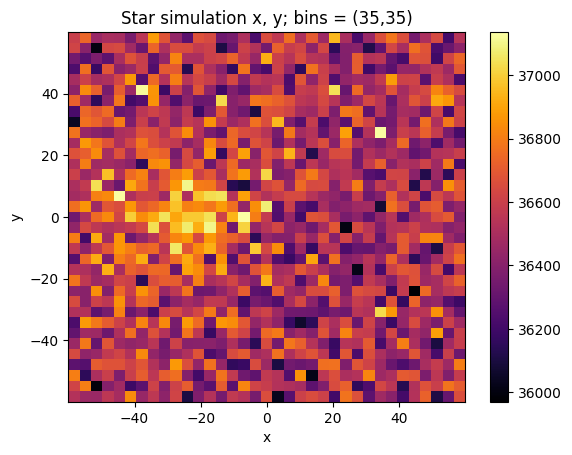

In [ ]:
plt.hist2d(x_s,y_s, bins=bins, cmap = "inferno")
plt.title("Star simulation x, y; bins = (35,35)")
plt.xlabel("x")
plt.ylabel("y")
plt.colorbar()

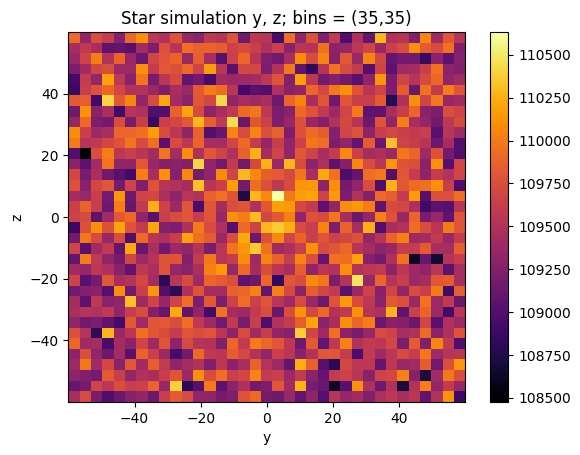

In [ ]:
plt.hist2d(y_s, z_s, bins = bins, cmap = "inferno")
plt.title("Star simulation y, z; bins = (35,35)")
plt.xlabel("y")
plt.ylabel("z")
plt.colorbar()

#hang